In [1]:
# imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# local
import wrangle_zillow as w

# Exercises Zillow
## Acquire and Summarize

1. Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.



In [2]:
df = w.get_zillow()
df

,typeconstructiontypeid,storytypeid,propertylandusetypeid,parcelid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,id.1,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,14297519,NaN,NaN,NaN,NaN,1727539,NaN,...,NaN,NaN,<NA>,NaN,0,0.025595,2017-01-01,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,17052889,NaN,NaN,NaN,NaN,1387261,NaN,...,NaN,NaN,<NA>,NaN,1,0.055619,2017-01-01,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,14186244,NaN,NaN,NaN,NaN,11677,NaN,...,NaN,NaN,<NA>,NaN,2,0.005383,2017-01-01,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,12177905,2.0,NaN,NaN,NaN,2288172,NaN,...,NaN,NaN,<NA>,Central,3,-0.103410,2017-01-01,Single Family Residential,NaN,NaN
4,NaN,NaN,266.0,10887214,2.0,NaN,NaN,1.0,1970746,NaN,...,Central,NaN,<NA>,Central,4,0.006940,2017-01-01,Condominium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,NaN,NaN,266.0,10833991,2.0,NaN,NaN,1.0,2864704,NaN,...,Central,NaN,<NA>,Central,77608,-0.002245,2017-09-20,Condominium,NaN,NaN
77609,NaN,NaN,261.0,11000655,2.0,NaN,NaN,NaN,673515,NaN,...,NaN,NaN,<NA>,Central,77609,0.020615,2017-09-20,Single Family Residential,NaN,NaN
77610,NaN,NaN,261.0,17239384,NaN,NaN,NaN,NaN,2968375,NaN,...,NaN,NaN,<NA>,NaN,77610,0.013209,2017-09-21,Single Family Residential,NaN,NaN
77611,NaN,NaN,261.0,12773139,2.0,NaN,NaN,1.0,1843709,NaN,...,Central,NaN,<NA>,Central,77611,0.037129,2017-09-21,Single Family Residential,NaN,NaN


2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77612
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77381 non-null  float64
 3   parcelid                      77381 non-null  int64  
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
typeconstructiontypeid,222.0,6.040541e+00,5.572847e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
storytypeid,50.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
propertylandusetypeid,77381.0,2.618263e+02,5.141199e+00,3.100000e+01,2.610000e+02,2.610000e+02,2.660000e+02,2.750000e+02
parcelid,77381.0,1.300715e+07,3.481346e+06,1.071186e+07,1.153830e+07,1.253157e+07,1.421183e+07,1.676893e+08
heatingorsystemtypeid,49440.0,3.920510e+00,3.592779e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
id,77381.0,1.495139e+06,8.609071e+05,3.490000e+02,7.520700e+05,1.497932e+06,2.240535e+06,2.982274e+06
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03


In [5]:
df.shape

(77381, 69)

In [6]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

def get_numeric_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    return df.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [7]:
for col in get_object_cols(df):
    print(df[col].value_counts(dropna=False).sort_values(ascending=False))

0100    26714
122     13045
010C     8813
0101     6399
34       4922
        ...  
0204        1
105         1
020G        1
020M        1
020E        1
Name: propertycountylandusecode, Length: 75, dtype: int64
NaN           27050
LAR1           6747
LAR3           2437
LARS           1389
LBR1N          1222
              ...  
DUR18000*         1
RBGC              1
POC4YY            1
LVRSP89-21        1
BFA15000*         1
Name: propertyzoningdesc, Length: 1908, dtype: int64
NaN    74495
Y       2886
Name: taxdelinquencyflag, dtype: int64
NaN              52428
Central          23133
Yes               1574
None               167
Wall Unit           53
Refrigeration       26
Name: airconditioningdesc, dtype: int64
NaN              77175
Contemporary       172
Conventional        19
Ranch/Rambler        7
Bungalow             5
Cape Cod             3
Name: architecturalstyledesc, dtype: int64
Central       33550
NaN           27941
Floor/Wall    14065
Yes             846
Forced air 

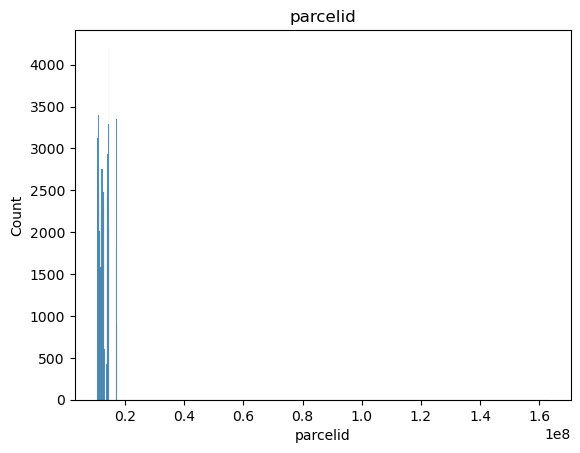

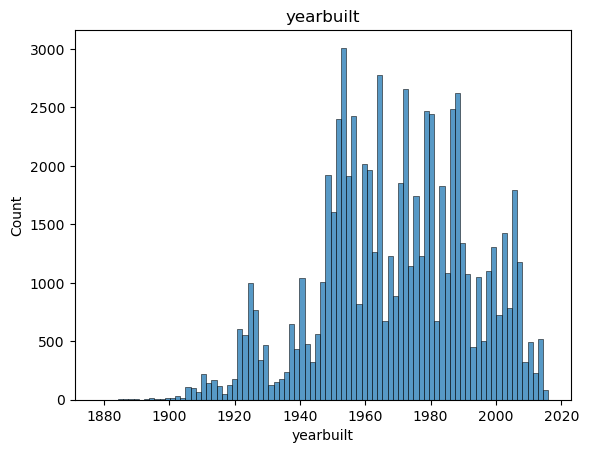

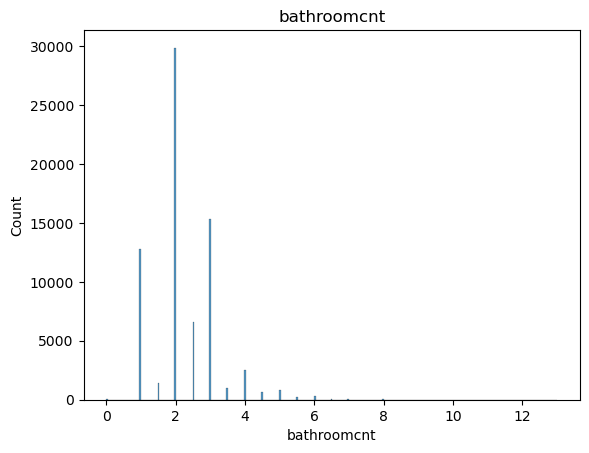

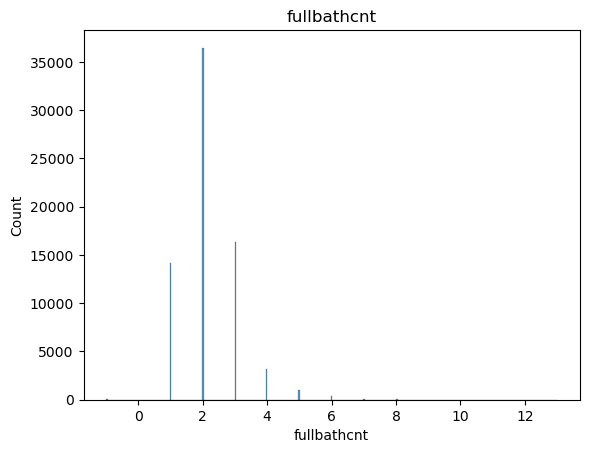

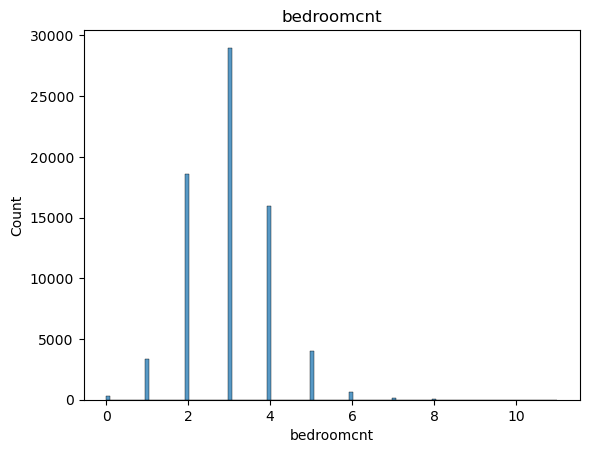

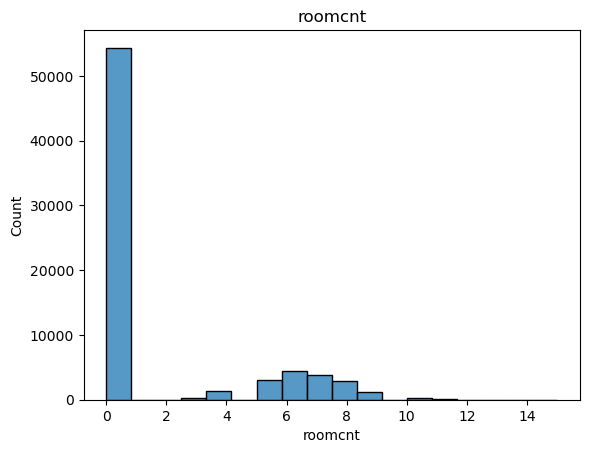

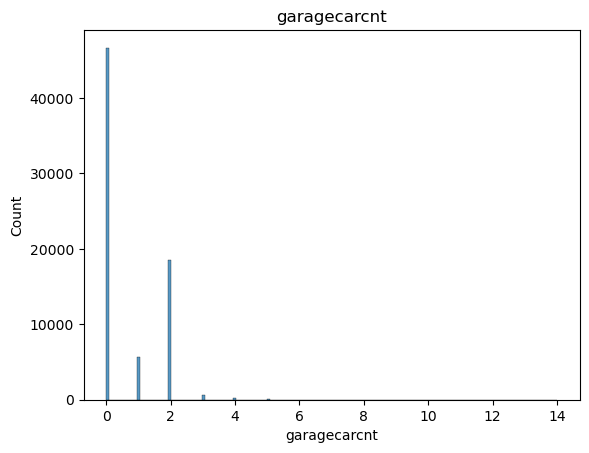

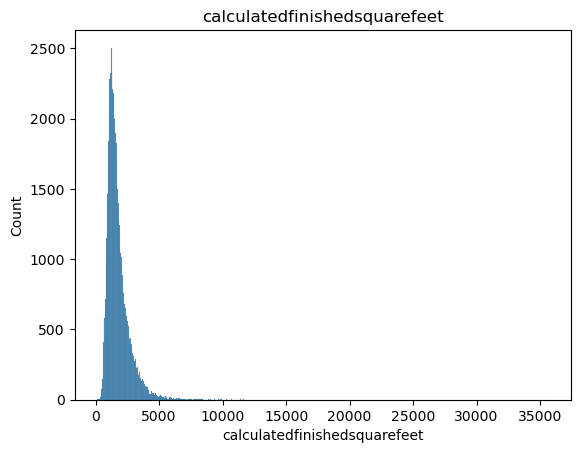

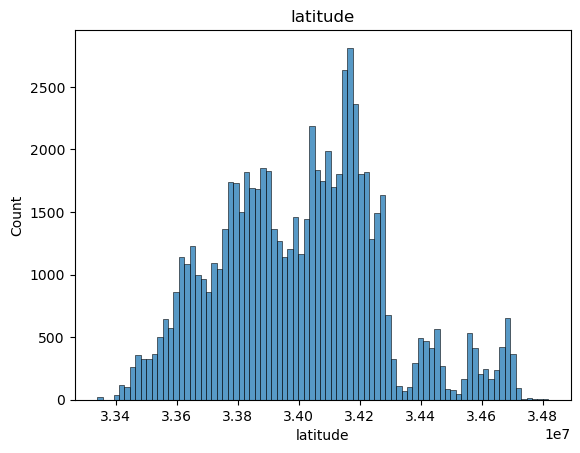

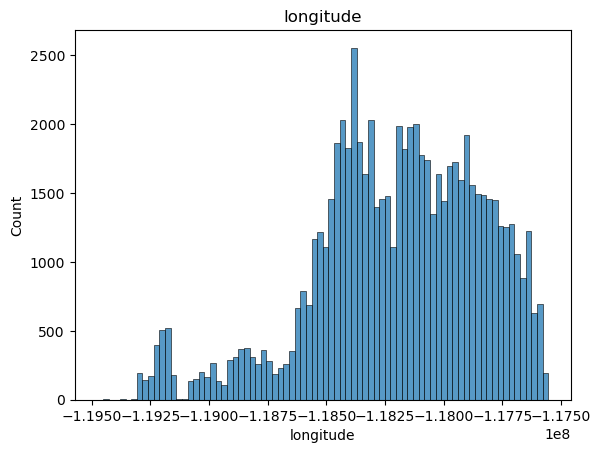

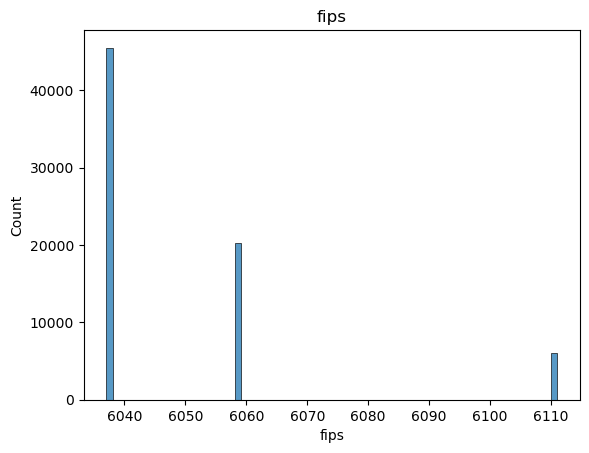

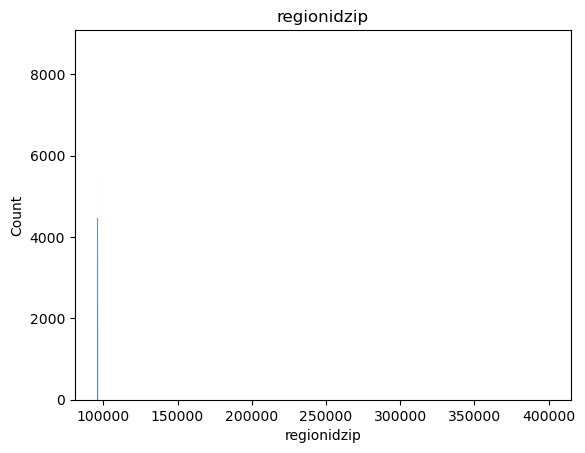

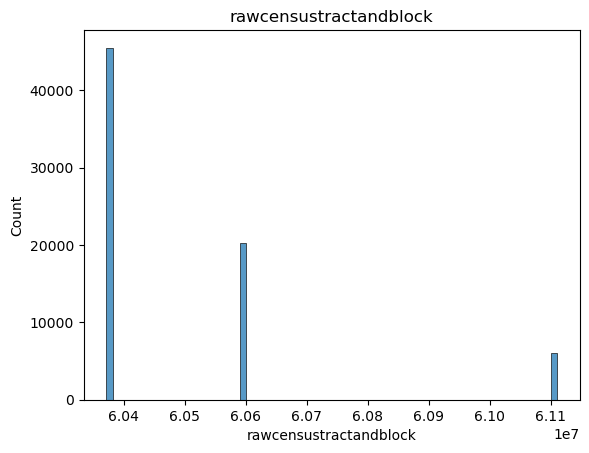

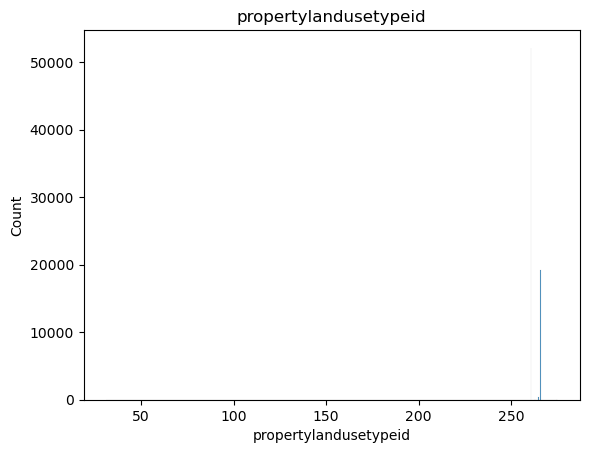

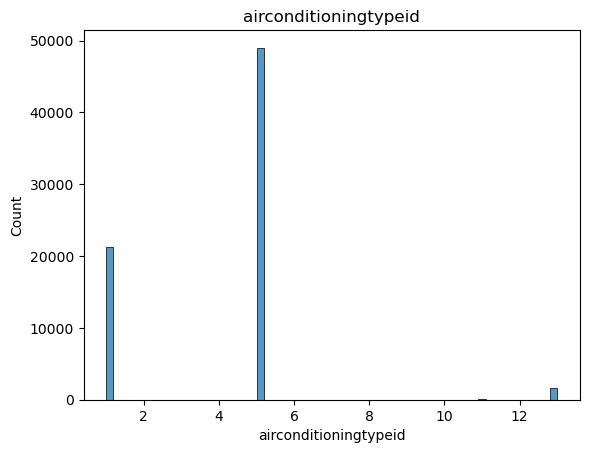

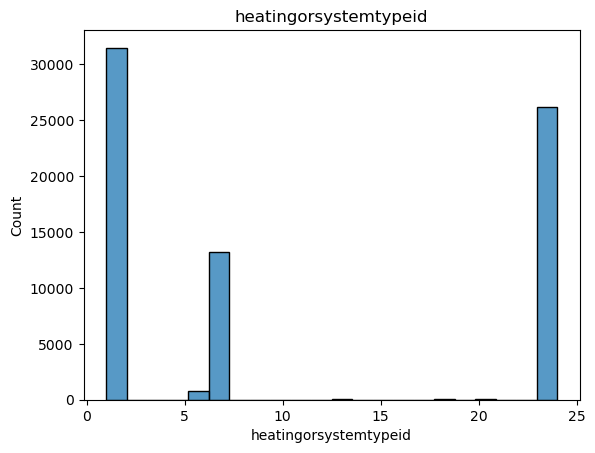

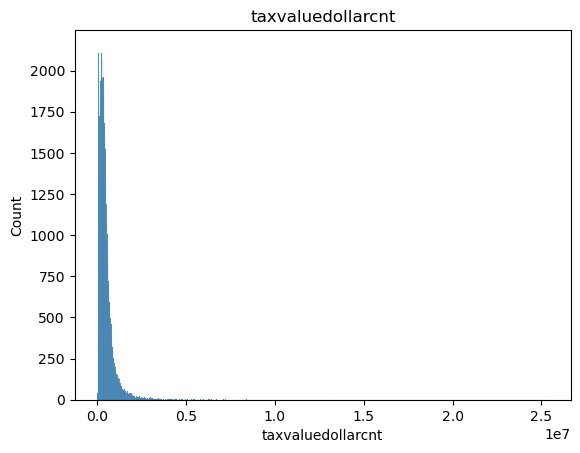

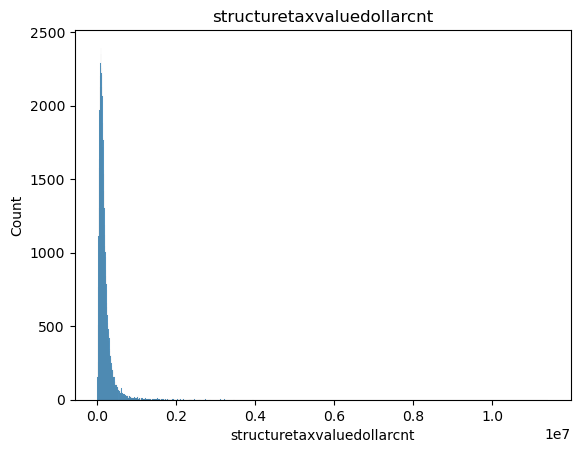

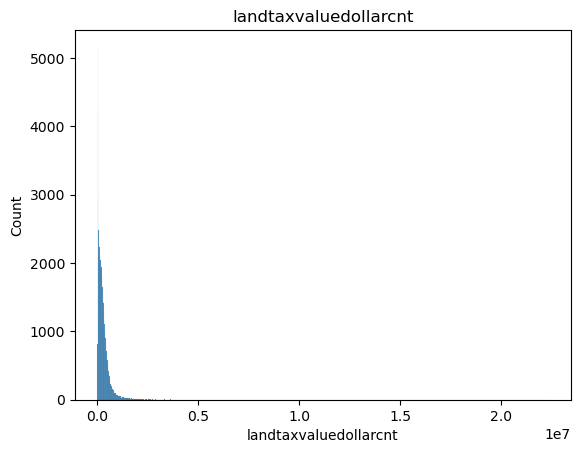

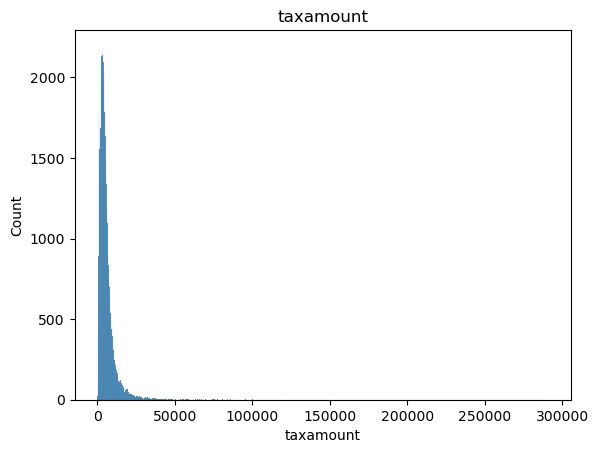

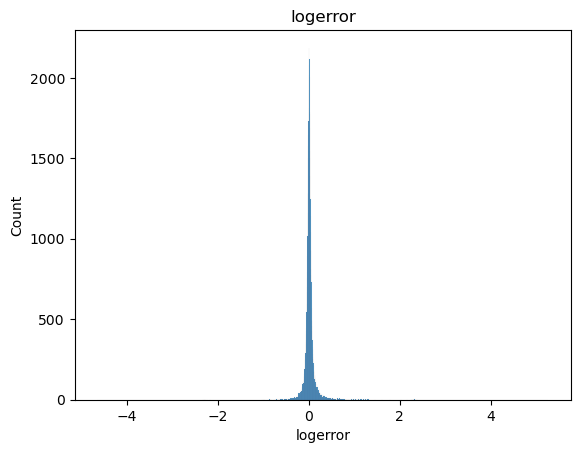

In [24]:
for col in get_numeric_cols(df):
    sns.histplot(df,x=col)
    plt.title(col)
    plt.show()

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [9]:
def nulls_by_col(df):
    """
    This function will:
        - take in a dataframe
        - assign a variable to a Series of total row nulls for ea/column
        - assign a variable to find the percent of rows w/nulls
        - output a df of the two variables.
    """
    num_missing = df.isnull().sum()
    # pct_miss = df.isnull().sum().mean()
    pct_miss = (num_missing / df.shape[0]) * 100
    return pd.DataFrame(
        {'num_rows_missing': num_missing, 'percent_rows_missing': pct_miss}
    )

In [10]:
def nulls_by_row(df, index_id = 'customer_id'):
    '''
    This is a function called `nulls_by_row` that takes a pandas DataFrame `df` and 
    an optional argument `index_id` (default value is 'customer_id'). The function 
    calculates the number of missing values in each row of the DataFrame and the percentage 
    of missing values in each row. It then creates a new DataFrame `rows_missing` with 
    columns 'num_cols_missing' and 'percent_cols_missing' and merges it with the original 
    DataFrame `df` using the index. The function returns the merged DataFrame sorted by the 
    number of missing values in each row in descending order.
    '''
    num_missing = df.isnull().sum(axis=1)
    pct_miss = (num_missing / df.shape[1]) * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': pct_miss})
    rows_missing = df.merge(rows_missing,
                        left_index=True,
                        right_index=True).reset_index()[[index_id, 'num_cols_missing', 'percent_cols_missing']]
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

In [11]:
nulls_by_col(df.iloc[:,:35])

,num_rows_missing,percent_rows_missing
typeconstructiontypeid,77159,99.713108
storytypeid,77331,99.935385
propertylandusetypeid,0,0.000000
parcelid,0,0.000000
heatingorsystemtypeid,27941,36.108347
buildingclasstypeid,77366,99.980615
architecturalstyletypeid,77175,99.733785
airconditioningtypeid,52428,67.753066
id,0,0.000000
basementsqft,77331,99.935385


In [12]:
nulls_by_col(df.iloc[:,35:])

,num_rows_missing,percent_rows_missing
pooltypeid7,62339,80.561120
propertycountylandusecode,0,0.000000
propertyzoningdesc,27050,34.956902
rawcensustractandblock,0,0.000000
regionidcity,1471,1.900983
regionidcounty,0,0.000000
regionidneighborhood,46491,60.080640
regionidzip,50,0.064615
roomcnt,0,0.000000
threequarterbathnbr,67285,86.952870


## Prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [13]:
# Filter rows based on column: 'unitcnt' and assumed single unit
df = df[(df['unitcnt'].isna()) | (df['unitcnt'] == 1)]
df = df[df.propertylandusetypeid.isin([31,260,261,263,264,265,266,267,275])]
df

,typeconstructiontypeid,storytypeid,propertylandusetypeid,parcelid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,id.1,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,14297519,NaN,NaN,NaN,NaN,1727539,NaN,...,NaN,NaN,<NA>,NaN,0,0.025595,2017-01-01,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,17052889,NaN,NaN,NaN,NaN,1387261,NaN,...,NaN,NaN,<NA>,NaN,1,0.055619,2017-01-01,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,14186244,NaN,NaN,NaN,NaN,11677,NaN,...,NaN,NaN,<NA>,NaN,2,0.005383,2017-01-01,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,12177905,2.0,NaN,NaN,NaN,2288172,NaN,...,NaN,NaN,<NA>,Central,3,-0.103410,2017-01-01,Single Family Residential,NaN,NaN
4,NaN,NaN,266.0,10887214,2.0,NaN,NaN,1.0,1970746,NaN,...,Central,NaN,<NA>,Central,4,0.006940,2017-01-01,Condominium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,NaN,NaN,266.0,10833991,2.0,NaN,NaN,1.0,2864704,NaN,...,Central,NaN,<NA>,Central,77608,-0.002245,2017-09-20,Condominium,NaN,NaN
77609,NaN,NaN,261.0,11000655,2.0,NaN,NaN,NaN,673515,NaN,...,NaN,NaN,<NA>,Central,77609,0.020615,2017-09-20,Single Family Residential,NaN,NaN
77610,NaN,NaN,261.0,17239384,NaN,NaN,NaN,NaN,2968375,NaN,...,NaN,NaN,<NA>,NaN,77610,0.013209,2017-09-21,Single Family Residential,NaN,NaN
77611,NaN,NaN,261.0,12773139,2.0,NaN,NaN,1.0,1843709,NaN,...,Central,NaN,<NA>,Central,77611,0.037129,2017-09-21,Single Family Residential,NaN,NaN


2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.


In [14]:
def remove_columns(df, cols_to_remove):
    """
    This function will:
    - take in a df and list of columns
    - drop the listed columns
    - return the new df
    """
    df = df.drop(columns=cols_to_remove)
    return df

In [15]:
def handle_missing_values(df, prop_required_columns=0.5, prop_required_rows=0.75):
    """
    This function will:
    - take in: 
        - a dataframe
        - column threshold (defaulted to 0.5)
        - row threshold (defaulted to 0.75)
    - calculates the minimum number of non-missing values required for each column/row to be retained
    - drops columns/rows with a high proportion of missing values.
    - returns the new df
    """
    
    column_threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=column_threshold)
    
    row_threshold = int(round(prop_required_rows * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=row_threshold)
    
    return df

In [16]:
def data_prep(df, col_to_remove=None, prop_required_columns=0.5, prop_required_rows=0.75):
    """
    This function will:
    - take in: 
        - a dataframe
        - list of columns
        - column threshold (defaulted to 0.5)
        - row threshold (defaulted to 0.75)
    - removes unwanted columns
    - remove rows and columns that contain a high proportion of missing values
    - returns cleaned df
    """
    if col_to_remove is None:
        col_to_remove = []
    df = remove_columns(df, col_to_remove)
    df = handle_missing_values(df, prop_required_columns, prop_required_rows)
    return df

In [17]:
df = data_prep(df,['id','id.1','regionidcity','regionidcounty','finishedsquarefeet12','lotsizesquarefeet','censustractandblock','regionidneighborhood','propertyzoningdesc','assessmentyear','propertycountylandusecode','buildingqualitytypeid','calculatedbathnbr','unitcnt','garagetotalsqft'],.3,.75)
df

,propertylandusetypeid,parcelid,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,garagecarcnt,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,airconditioningdesc,heatingorsystemdesc,logerror,transactiondate,propertylandusedesc
0,261.0,14297519,NaN,NaN,3.5,4.0,3100.0,6059.0,3.0,2.0,...,1998.0,485713.0,1023282.0,537569.0,11013.72,NaN,NaN,0.025595,2017-01-01,Single Family Residential
1,261.0,17052889,NaN,NaN,1.0,2.0,1465.0,6111.0,1.0,1.0,...,1967.0,88000.0,464000.0,376000.0,5672.48,NaN,NaN,0.055619,2017-01-01,Single Family Residential
2,261.0,14186244,NaN,NaN,2.0,3.0,1243.0,6059.0,2.0,2.0,...,1962.0,85289.0,564778.0,479489.0,6488.30,NaN,NaN,0.005383,2017-01-01,Single Family Residential
3,261.0,12177905,2.0,NaN,3.0,4.0,2376.0,6037.0,3.0,NaN,...,1970.0,108918.0,145143.0,36225.0,1777.51,NaN,Central,-0.103410,2017-01-01,Single Family Residential
4,266.0,10887214,2.0,1.0,3.0,3.0,1312.0,6037.0,3.0,NaN,...,1964.0,73681.0,119407.0,45726.0,1533.89,Central,Central,0.006940,2017-01-01,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,266.0,10833991,2.0,1.0,3.0,3.0,1741.0,6037.0,3.0,NaN,...,1980.0,265000.0,379000.0,114000.0,4685.34,Central,Central,-0.002245,2017-09-20,Condominium
77609,261.0,11000655,2.0,NaN,2.0,2.0,1286.0,6037.0,2.0,NaN,...,1940.0,70917.0,354621.0,283704.0,4478.43,NaN,Central,0.020615,2017-09-20,Single Family Residential
77610,261.0,17239384,NaN,NaN,2.0,4.0,1612.0,6111.0,2.0,2.0,...,1964.0,50683.0,67205.0,16522.0,1107.48,NaN,NaN,0.013209,2017-09-21,Single Family Residential
77611,261.0,12773139,2.0,1.0,1.0,3.0,1032.0,6037.0,1.0,NaN,...,1954.0,32797.0,49546.0,16749.0,876.43,Central,Central,0.037129,2017-09-21,Single Family Residential


In [18]:
# Replace missing values with 0 in column: 'fullbathcnt'
df = df.fillna({'fullbathcnt': round(df.bathroomcnt,0)-1})

# Replace missing values with 0 in column: 'garagecarcnt'
df = df.fillna({'garagecarcnt': 0})

# Replace missing values with 5 in column: 'airconditioningtypeid'
df = df.fillna({'airconditioningtypeid': 5})

# Replace missing values with "None" in column: 'airconditioningdesc'
df = df.fillna({'airconditioningdesc': "None"})

# Replace missing values with 24 in column: 'heatingorsystemtypeid'
df = df.fillna({'heatingorsystemtypeid': 24})

# Replace missing values with "Yes" in column: 'heatingorsystemdesc'
df = df.fillna({'heatingorsystemdesc': "Yes"})

# Replace missing values with taxvalue-landtax in column: 'structuretaxvaluedollarcnt'
df = df.fillna({'structuretaxvaluedollarcnt': df['taxvaluedollarcnt']-df['landtaxvaluedollarcnt']})

# Drop rows with missing data across all columns
df = df.dropna()

In [19]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
propertylandusetypeid,0,0.0
parcelid,0,0.0
heatingorsystemtypeid,0,0.0
airconditioningtypeid,0,0.0
bathroomcnt,0,0.0
bedroomcnt,0,0.0
calculatedfinishedsquarefeet,0,0.0
fips,0,0.0
fullbathcnt,0,0.0
garagecarcnt,0,0.0


In [20]:
df = df[['parcelid','yearbuilt','bathroomcnt','fullbathcnt','bedroomcnt','roomcnt','garagecarcnt','calculatedfinishedsquarefeet','latitude','longitude','fips','regionidzip','rawcensustractandblock','propertylandusetypeid','propertylandusedesc','airconditioningtypeid','airconditioningdesc','heatingorsystemtypeid','heatingorsystemdesc','taxvaluedollarcnt','structuretaxvaluedollarcnt','landtaxvaluedollarcnt','taxamount','logerror','transactiondate']]
df

,parcelid,yearbuilt,bathroomcnt,fullbathcnt,bedroomcnt,roomcnt,garagecarcnt,calculatedfinishedsquarefeet,latitude,longitude,...,airconditioningtypeid,airconditioningdesc,heatingorsystemtypeid,heatingorsystemdesc,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,14297519,1998.0,3.5,3.0,4.0,0.0,2.0,3100.0,33634931.0,-117869207.0,...,5.0,None,24.0,Yes,1023282.0,485713.0,537569.0,11013.72,0.025595,2017-01-01
1,17052889,1967.0,1.0,1.0,2.0,5.0,1.0,1465.0,34449266.0,-119281531.0,...,5.0,None,24.0,Yes,464000.0,88000.0,376000.0,5672.48,0.055619,2017-01-01
2,14186244,1962.0,2.0,2.0,3.0,6.0,2.0,1243.0,33886168.0,-117823170.0,...,5.0,None,24.0,Yes,564778.0,85289.0,479489.0,6488.30,0.005383,2017-01-01
3,12177905,1970.0,3.0,3.0,4.0,0.0,0.0,2376.0,34245180.0,-118240722.0,...,5.0,None,2.0,Central,145143.0,108918.0,36225.0,1777.51,-0.103410,2017-01-01
4,10887214,1964.0,3.0,3.0,3.0,0.0,0.0,1312.0,34185120.0,-118414640.0,...,1.0,Central,2.0,Central,119407.0,73681.0,45726.0,1533.89,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,10833991,1980.0,3.0,3.0,3.0,0.0,0.0,1741.0,34202400.0,-118502000.0,...,1.0,Central,2.0,Central,379000.0,265000.0,114000.0,4685.34,-0.002245,2017-09-20
77609,11000655,1940.0,2.0,2.0,2.0,0.0,0.0,1286.0,34245368.0,-118282383.0,...,5.0,None,2.0,Central,354621.0,70917.0,283704.0,4478.43,0.020615,2017-09-20
77610,17239384,1964.0,2.0,2.0,4.0,7.0,2.0,1612.0,34300140.0,-118706327.0,...,5.0,None,24.0,Yes,67205.0,50683.0,16522.0,1107.48,0.013209,2017-09-21
77611,12773139,1954.0,1.0,1.0,3.0,0.0,0.0,1032.0,34040895.0,-118038169.0,...,1.0,Central,2.0,Central,49546.0,32797.0,16749.0,876.43,0.037129,2017-09-21


3. Encapsulate your work inside of functions in a wrangle_zillow.py module.

In [21]:
def prep_zillow(df):
    '''send uncleaned zillow df to prep and clean'''
    # Filter rows based on column: 'unitcnt' and assumed single unit
    df = df[(df['unitcnt'].isna()) | (df['unitcnt'] == 1)]
    df = df[df.propertylandusetypeid.isin([31,260,261,263,264,265,266,267,275])]
    # drop some columns and handle some major nulls
    df = data_prep(df,['id','id.1','regionidcity','regionidcounty','finishedsquarefeet12','lotsizesquarefeet','censustractandblock','regionidneighborhood','propertyzoningdesc','assessmentyear','propertycountylandusecode','buildingqualitytypeid','calculatedbathnbr','unitcnt','garagetotalsqft'],.3,.75)
    # Replace missing values with 0 in column: 'fullbathcnt'
    df = df.fillna({'fullbathcnt': round(df.bathroomcnt,0)-1})
    # Replace missing values with 0 in column: 'garagecarcnt'
    df = df.fillna({'garagecarcnt': 0})
    # Replace missing values with 5 in column: 'airconditioningtypeid'
    df = df.fillna({'airconditioningtypeid': 5})
    # Replace missing values with "None" in column: 'airconditioningdesc'
    df = df.fillna({'airconditioningdesc': "None"})
    # Replace missing values with 24 in column: 'heatingorsystemtypeid'
    df = df.fillna({'heatingorsystemtypeid': 24})
    # Replace missing values with "Yes" in column: 'heatingorsystemdesc'
    df = df.fillna({'heatingorsystemdesc': "Yes"})
    # Replace missing values with taxvalue-landtax in column: 'structuretaxvaluedollarcnt'
    df = df.fillna({'structuretaxvaluedollarcnt': df['taxvaluedollarcnt']-df['landtaxvaluedollarcnt']})
    # Drop rows with missing data across all columns
    df = df.dropna()
    df = df[['parcelid','yearbuilt','bathroomcnt','fullbathcnt','bedroomcnt','roomcnt','garagecarcnt','calculatedfinishedsquarefeet','latitude','longitude','fips','regionidzip','rawcensustractandblock','propertylandusetypeid','propertylandusedesc','airconditioningtypeid','airconditioningdesc','heatingorsystemtypeid','heatingorsystemdesc','taxvaluedollarcnt','structuretaxvaluedollarcnt','landtaxvaluedollarcnt','taxamount','logerror','transactiondate']]
    return df

In [22]:
df = prep_zillow(w.get_zillow())
df

,parcelid,yearbuilt,bathroomcnt,fullbathcnt,bedroomcnt,roomcnt,garagecarcnt,calculatedfinishedsquarefeet,latitude,longitude,...,airconditioningtypeid,airconditioningdesc,heatingorsystemtypeid,heatingorsystemdesc,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,14297519,1998.0,3.5,3.0,4.0,0.0,2.0,3100.0,33634931.0,-117869207.0,...,5.0,None,24.0,Yes,1023282.0,485713.0,537569.0,11013.72,0.025595,2017-01-01
1,17052889,1967.0,1.0,1.0,2.0,5.0,1.0,1465.0,34449266.0,-119281531.0,...,5.0,None,24.0,Yes,464000.0,88000.0,376000.0,5672.48,0.055619,2017-01-01
2,14186244,1962.0,2.0,2.0,3.0,6.0,2.0,1243.0,33886168.0,-117823170.0,...,5.0,None,24.0,Yes,564778.0,85289.0,479489.0,6488.30,0.005383,2017-01-01
3,12177905,1970.0,3.0,3.0,4.0,0.0,0.0,2376.0,34245180.0,-118240722.0,...,5.0,None,2.0,Central,145143.0,108918.0,36225.0,1777.51,-0.103410,2017-01-01
4,10887214,1964.0,3.0,3.0,3.0,0.0,0.0,1312.0,34185120.0,-118414640.0,...,1.0,Central,2.0,Central,119407.0,73681.0,45726.0,1533.89,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,10833991,1980.0,3.0,3.0,3.0,0.0,0.0,1741.0,34202400.0,-118502000.0,...,1.0,Central,2.0,Central,379000.0,265000.0,114000.0,4685.34,-0.002245,2017-09-20
77609,11000655,1940.0,2.0,2.0,2.0,0.0,0.0,1286.0,34245368.0,-118282383.0,...,5.0,None,2.0,Central,354621.0,70917.0,283704.0,4478.43,0.020615,2017-09-20
77610,17239384,1964.0,2.0,2.0,4.0,7.0,2.0,1612.0,34300140.0,-118706327.0,...,5.0,None,24.0,Yes,67205.0,50683.0,16522.0,1107.48,0.013209,2017-09-21
77611,12773139,1954.0,1.0,1.0,3.0,0.0,0.0,1032.0,34040895.0,-118038169.0,...,1.0,Central,2.0,Central,49546.0,32797.0,16749.0,876.43,0.037129,2017-09-21


In [23]:
df = w.wrangle_zillow()
df

,parcelid,yearbuilt,bathroomcnt,fullbathcnt,bedroomcnt,roomcnt,garagecarcnt,calculatedfinishedsquarefeet,latitude,longitude,...,airconditioningtypeid,airconditioningdesc,heatingorsystemtypeid,heatingorsystemdesc,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,14297519,1998.0,3.5,3.0,4.0,0.0,2.0,3100.0,33634931.0,-117869207.0,...,5.0,None,24.0,Yes,1023282.0,485713.0,537569.0,11013.72,0.025595,2017-01-01
1,17052889,1967.0,1.0,1.0,2.0,5.0,1.0,1465.0,34449266.0,-119281531.0,...,5.0,None,24.0,Yes,464000.0,88000.0,376000.0,5672.48,0.055619,2017-01-01
2,14186244,1962.0,2.0,2.0,3.0,6.0,2.0,1243.0,33886168.0,-117823170.0,...,5.0,None,24.0,Yes,564778.0,85289.0,479489.0,6488.30,0.005383,2017-01-01
3,12177905,1970.0,3.0,3.0,4.0,0.0,0.0,2376.0,34245180.0,-118240722.0,...,5.0,None,2.0,Central,145143.0,108918.0,36225.0,1777.51,-0.103410,2017-01-01
4,10887214,1964.0,3.0,3.0,3.0,0.0,0.0,1312.0,34185120.0,-118414640.0,...,1.0,Central,2.0,Central,119407.0,73681.0,45726.0,1533.89,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,10833991,1980.0,3.0,3.0,3.0,0.0,0.0,1741.0,34202400.0,-118502000.0,...,1.0,Central,2.0,Central,379000.0,265000.0,114000.0,4685.34,-0.002245,2017-09-20
77609,11000655,1940.0,2.0,2.0,2.0,0.0,0.0,1286.0,34245368.0,-118282383.0,...,5.0,None,2.0,Central,354621.0,70917.0,283704.0,4478.43,0.020615,2017-09-20
77610,17239384,1964.0,2.0,2.0,4.0,7.0,2.0,1612.0,34300140.0,-118706327.0,...,5.0,None,24.0,Yes,67205.0,50683.0,16522.0,1107.48,0.013209,2017-09-21
77611,12773139,1954.0,1.0,1.0,3.0,0.0,0.0,1032.0,34040895.0,-118038169.0,...,1.0,Central,2.0,Central,49546.0,32797.0,16749.0,876.43,0.037129,2017-09-21
